In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current dpip install ultralyticsirectory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT PACKAGES**

In [2]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.7/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tAFRYqzjQXahvMhjPcZv")
project = rf.workspace("sixray-dpgc6").project("weapon_detection-cuahn")
dataset = project.version(4).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.231, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to weapon_detection-4 in yolov8:: 100%|██████████| 6008/6008 [00:00<00:00, 6252.13it/s]


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8n.pt')
#yolo8_model_detection.predict(source='https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/I-80_Eastshore_Fwy.jpg/1200px-I-80_Eastshore_Fwy.jpg',save_txt=True ,save=True,exist_ok=True)
#Image(filename='runs/detect/predict/1200px-I-80_Eastshore_Fwy.jpg', height=300,width=500) 

100%|██████████| 6.23M/6.23M [00:00<00:00, 102MB/s]


# **COPY DATASET IN A NEW DIRECTORY**

In [7]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/weapon_detection-4 datasets/SixRayFull-2

# **TRAIN MODEL**

In [9]:
# Define dataset path, epochs, image-size, Bacth and output directory.
yolo8_model_detection.train(data= '/kaggle/working/datasets/SixRayFull-2/data.yaml', epochs=150, imgsz=640, batch=64,project='YOLO_weights',name='SIXray_Output',exist_ok=True, device=[0, 1])

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/datasets/SixRayFull-2/data.yaml, epochs=150, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=6
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/train/labels.cache... 2304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2304/2304 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      4.85G      1.442      3.283      1.439        168        640: 100%|██████████| 36/36 [00:26<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]


                   all        466       1127       0.84     0.0677      0.142     0.0962

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      4.47G       1.17      1.872      1.239        155        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        466       1127      0.744      0.235      0.329      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      4.46G      1.158      1.584      1.253        152        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.692      0.269      0.332      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      4.46G      1.162      1.483      1.267        139        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


                   all        466       1127      0.689      0.263      0.292      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      4.48G      1.116      1.345      1.231        138        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        466       1127      0.821      0.372      0.428      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      4.46G      1.061      1.225      1.202        101        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.64it/s]


                   all        466       1127      0.824       0.47      0.505      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      4.47G      1.085      1.173      1.228        116        640: 100%|██████████| 36/36 [00:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]


                   all        466       1127      0.852      0.431      0.503       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      4.49G      1.073      1.111      1.216        112        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


                   all        466       1127      0.709      0.463      0.526      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      4.43G      1.057      1.058      1.208        153        640: 100%|██████████| 36/36 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


                   all        466       1127      0.872      0.499      0.544      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      4.47G      1.019     0.9876      1.179        157        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]


                   all        466       1127      0.675      0.488      0.525      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      4.45G      1.008     0.9877       1.18        115        640: 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


                   all        466       1127      0.695      0.503       0.58      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      4.47G      1.001     0.9297      1.168        137        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.746      0.539      0.597      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      4.46G      1.019     0.9474      1.176        163        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        466       1127      0.679      0.512       0.55      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      4.47G     0.9697     0.8811      1.149        175        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


                   all        466       1127      0.751      0.545      0.616       0.45

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      4.49G     0.9982     0.9061      1.179        167        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.529      0.505      0.563       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      4.43G     0.9803     0.8583      1.163        163        640: 100%|██████████| 36/36 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]


                   all        466       1127      0.557      0.553      0.594      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      4.45G     0.9394     0.8268      1.133        144        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.81it/s]


                   all        466       1127      0.953      0.528      0.687      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      4.46G      0.936     0.8231      1.132        162        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        466       1127      0.752      0.695      0.721       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      4.47G     0.9549     0.8113       1.14        133        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


                   all        466       1127      0.935      0.557      0.806      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      4.47G     0.9285      0.793       1.13        178        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


                   all        466       1127      0.772      0.607      0.619      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      4.48G     0.9353     0.7969      1.126        155        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.789       0.63      0.665      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      4.38G      0.931     0.7779      1.125        154        640: 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        466       1127      0.909      0.551       0.62      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      4.49G     0.9204     0.7741      1.115        161        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.936      0.562      0.777      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      4.48G     0.9216     0.7549      1.121        124        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


                   all        466       1127      0.944      0.581      0.757      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      4.49G     0.8997     0.7512      1.122        149        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        466       1127      0.947      0.547      0.858      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      4.47G     0.9182     0.7444      1.129        138        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.822      0.653      0.836      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      4.44G     0.8873     0.7154      1.102        135        640: 100%|██████████| 36/36 [00:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.839      0.624      0.668      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      4.49G     0.8998     0.7226      1.114        117        640: 100%|██████████| 36/36 [00:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


                   all        466       1127      0.834      0.689      0.768      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      4.46G     0.8716     0.6984      1.088        161        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


                   all        466       1127      0.744      0.647      0.805      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      4.47G     0.8971     0.7031      1.107        127        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]


                   all        466       1127      0.756      0.572      0.675      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      4.47G     0.8711     0.7007      1.091        155        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.774      0.565       0.69      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      4.46G     0.8756     0.7035      1.108        165        640: 100%|██████████| 36/36 [00:24<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


                   all        466       1127      0.836      0.662      0.848      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      4.43G     0.8716     0.6965      1.096        150        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        466       1127       0.91      0.678      0.755      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      4.49G     0.8622     0.6862      1.087        176        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.831      0.675      0.857      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      4.49G      0.883     0.7002      1.103        137        640: 100%|██████████| 36/36 [00:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


                   all        466       1127      0.935      0.576      0.704      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      4.48G     0.8502     0.6777      1.078        153        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        466       1127      0.963      0.575      0.813      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      4.43G     0.8638     0.6779      1.093        152        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.949      0.562      0.648      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      4.46G     0.8408     0.6576      1.082        151        640: 100%|██████████| 36/36 [00:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.863      0.709      0.777      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      4.48G     0.8388     0.6416      1.073        124        640: 100%|██████████| 36/36 [00:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.942      0.592      0.819      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      4.48G     0.8541      0.663      1.086        139        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.881      0.706      0.901      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      4.45G     0.8399     0.6469      1.079        136        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.889      0.664      0.865      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      4.49G     0.8397     0.6445      1.078        147        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


                   all        466       1127      0.964      0.594      0.847      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      4.48G     0.8318     0.6356      1.072        138        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.903      0.605      0.844      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      4.47G     0.8341     0.6388      1.076        140        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]


                   all        466       1127      0.951      0.634      0.858       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      4.45G     0.8352     0.6373       1.07        143        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


                   all        466       1127      0.929      0.625      0.855      0.676

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      4.46G     0.8346     0.6335      1.071        108        640: 100%|██████████| 36/36 [00:25<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


                   all        466       1127      0.937      0.743      0.851       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      4.48G     0.8245     0.6391      1.064        131        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


                   all        466       1127      0.767      0.912       0.91      0.694

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      4.49G     0.8111     0.6224      1.065        134        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.862      0.845       0.92      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      4.48G     0.8092     0.6203      1.065        155        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.679      0.884      0.913      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      4.48G      0.815     0.6102      1.063        146        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]


                   all        466       1127      0.917      0.747      0.802      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      4.45G     0.8149     0.6116      1.064        155        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]


                   all        466       1127      0.769       0.92      0.927      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      4.47G     0.8197     0.6265       1.06        177        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]


                   all        466       1127      0.931      0.905      0.949      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      4.49G     0.8091     0.6061      1.066        178        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


                   all        466       1127      0.892      0.881       0.91      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      4.48G     0.8051     0.6081      1.056        169        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.807      0.812      0.862      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      4.43G     0.8111     0.6068      1.063        172        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127       0.74      0.849      0.867      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      4.46G     0.8029     0.6003      1.057        146        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.794      0.925       0.91      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      4.48G     0.7891     0.5919      1.045        142        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.857      0.872      0.907       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      4.46G     0.7954     0.5957       1.06        152        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.852       0.88      0.913      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      4.49G     0.8028     0.5896      1.057        164        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


                   all        466       1127      0.881      0.789      0.862       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      4.48G     0.7894     0.5818      1.044        158        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


                   all        466       1127      0.807      0.843      0.891      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      4.48G     0.7926      0.578      1.046        169        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        466       1127      0.748      0.931      0.927      0.728

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      4.49G     0.7965     0.5907      1.061        125        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.909      0.709      0.891       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      4.48G     0.7873     0.5857      1.052        139        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


                   all        466       1127      0.743      0.852      0.864      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      4.38G     0.7926     0.5657       1.05        154        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.685      0.887      0.884      0.725

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      4.48G     0.7862     0.5844      1.052        148        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.742      0.868       0.91      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      4.46G     0.7714     0.5697      1.034        159        640: 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]


                   all        466       1127      0.957      0.902      0.936      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      4.47G     0.7775     0.5671      1.047        150        640: 100%|██████████| 36/36 [00:23<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        466       1127      0.634      0.925      0.895      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      4.49G     0.7725      0.561      1.032        131        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.826      0.902       0.94      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      4.48G     0.7652     0.5719      1.036        137        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


                   all        466       1127      0.854      0.864      0.893      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      4.47G     0.7699     0.5597      1.037        140        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.891      0.849        0.9      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      4.46G     0.7692     0.5644      1.041        129        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        466       1127       0.87      0.922      0.938      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      4.48G      0.761     0.5501      1.034        135        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]


                   all        466       1127      0.865      0.897      0.922       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      4.47G     0.7773     0.5678      1.039        151        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.925      0.821      0.896      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      4.45G     0.7452     0.5309      1.015        146        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


                   all        466       1127      0.936      0.867       0.92      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      4.49G     0.7537     0.5503      1.032        151        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


                   all        466       1127      0.851      0.899      0.929      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      4.46G     0.7411     0.5281      1.022        163        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]


                   all        466       1127      0.714      0.982      0.927      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      4.46G     0.7343     0.5385       1.02        127        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]


                   all        466       1127      0.939      0.904      0.939      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      4.46G     0.7419      0.531      1.025        146        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.879      0.884      0.918      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      4.43G     0.7417     0.5321      1.022        160        640: 100%|██████████| 36/36 [00:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        466       1127      0.933      0.902      0.943      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      4.46G     0.7484     0.5426      1.031        146        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


                   all        466       1127      0.862      0.925       0.92       0.75

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      4.46G     0.7477     0.5413      1.026        135        640: 100%|██████████| 36/36 [00:25<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127       0.95      0.841      0.953      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      4.48G     0.7475     0.5353      1.024        156        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]


                   all        466       1127      0.917      0.894      0.941      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      4.47G      0.716     0.5081      1.009        163        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


                   all        466       1127      0.917      0.869      0.923      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      4.48G     0.7321     0.5237      1.022        164        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.943      0.823      0.932      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      4.48G     0.7272     0.5275      1.018        198        640: 100%|██████████| 36/36 [00:24<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


                   all        466       1127      0.955      0.857      0.908      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      4.46G     0.7475     0.5319      1.028        155        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


                   all        466       1127      0.934      0.794      0.907      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      4.46G     0.7097     0.5099      1.014        138        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        466       1127      0.916      0.913      0.944      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      4.48G     0.7261     0.5196      1.022        126        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


                   all        466       1127      0.913      0.876      0.917      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      4.46G     0.7288     0.5214      1.019        149        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]


                   all        466       1127      0.889      0.836      0.879      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      4.43G     0.7212     0.5197      1.023        127        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


                   all        466       1127      0.951      0.846      0.904       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      4.48G     0.7319     0.5262      1.023        147        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.911      0.867      0.911      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      4.43G     0.7373     0.5286      1.024        164        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        466       1127      0.937      0.818      0.906       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      4.46G     0.7167     0.5105      1.012        140        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.928      0.843       0.91      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      4.46G     0.7215     0.5061       1.02        150        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


                   all        466       1127      0.949      0.852      0.924      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      4.46G     0.7059     0.5005      1.007        130        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


                   all        466       1127      0.947      0.858      0.934      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      4.49G     0.7202     0.5099       1.02        135        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.891      0.913      0.953      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      4.46G     0.7152     0.4991      1.019        145        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


                   all        466       1127      0.947      0.869      0.928      0.755

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      4.43G     0.7148      0.512      1.005        134        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


                   all        466       1127      0.923       0.85      0.924      0.742

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      4.48G     0.6997      0.492     0.9975        148        640: 100%|██████████| 36/36 [00:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


                   all        466       1127      0.934      0.901      0.961      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      4.47G     0.7114     0.4985      1.012        179        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]


                   all        466       1127      0.948      0.857      0.939       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      4.47G     0.7104     0.5055      1.011        125        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]


                   all        466       1127       0.93      0.875      0.935      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      4.43G     0.6963     0.4843      1.003        136        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


                   all        466       1127      0.819      0.952      0.956      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      4.46G     0.6773      0.488     0.9917        142        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.954      0.861      0.917      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      4.45G     0.6875     0.4903     0.9949         98        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]


                   all        466       1127       0.93      0.876      0.916      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      4.47G     0.6909     0.4891          1        133        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]


                   all        466       1127      0.919       0.85       0.93       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      4.47G     0.6893     0.4889     0.9972        112        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]


                   all        466       1127      0.859      0.932      0.926      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      4.48G     0.6787     0.4734     0.9938        163        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.941      0.856      0.911      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      4.49G     0.6882       0.48     0.9937        139        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


                   all        466       1127      0.944      0.872      0.922      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      4.45G     0.6771     0.4727     0.9961        146        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]


                   all        466       1127       0.92       0.88      0.935      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      4.47G     0.6786     0.4772      0.989        132        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


                   all        466       1127      0.936       0.88      0.921      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      4.46G     0.6871     0.4855     0.9989        110        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]


                   all        466       1127      0.956      0.886      0.947      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      4.47G     0.6806     0.4719     0.9967        145        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


                   all        466       1127      0.929      0.895      0.963      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      4.48G     0.6932     0.4856     0.9982        142        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


                   all        466       1127      0.937      0.857      0.932      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      4.46G     0.6649     0.4659      0.978        123        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.948      0.857      0.939       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      4.48G     0.6724     0.4689      0.989        152        640: 100%|██████████| 36/36 [00:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]


                   all        466       1127      0.937      0.904      0.946      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      4.47G     0.6761     0.4668     0.9913        164        640: 100%|██████████| 36/36 [00:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.922      0.915      0.954      0.777

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      4.43G     0.6719     0.4643     0.9867        140        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


                   all        466       1127      0.948      0.864      0.928      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      4.45G     0.6602      0.466     0.9875        145        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.948       0.87      0.915      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      4.43G      0.655     0.4499     0.9784        131        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.952       0.87      0.915      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      4.48G     0.6553     0.4636      0.988        126        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


                   all        466       1127      0.939      0.877      0.927      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      4.48G     0.6644     0.4676     0.9839        144        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


                   all        466       1127      0.913      0.877      0.905      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      4.49G     0.6461     0.4543     0.9806        155        640: 100%|██████████| 36/36 [00:24<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


                   all        466       1127      0.951      0.866      0.917       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      4.46G     0.6657     0.4663     0.9908        161        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]


                   all        466       1127      0.957      0.869      0.927       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      4.48G     0.6574     0.4602     0.9836        131        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


                   all        466       1127      0.944       0.87      0.934      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      4.43G     0.6645     0.4572     0.9841        149        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.955      0.865      0.943      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      4.47G     0.6527     0.4528     0.9831        169        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]


                   all        466       1127       0.93      0.923      0.952      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      4.46G      0.654     0.4578     0.9817        127        640: 100%|██████████| 36/36 [00:22<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.949      0.869      0.921       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      4.47G     0.6445      0.454     0.9846        129        640: 100%|██████████| 36/36 [00:23<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]


                   all        466       1127      0.945      0.868      0.923      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      4.46G     0.6551     0.4628     0.9855        140        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        466       1127      0.949      0.876      0.918      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      4.48G     0.6509     0.4554     0.9791        134        640: 100%|██████████| 36/36 [00:24<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]


                   all        466       1127      0.941      0.882      0.922      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      4.45G     0.6464     0.4463     0.9742        160        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]


                   all        466       1127       0.93      0.915      0.944      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      4.45G     0.6443     0.4494     0.9838        166        640: 100%|██████████| 36/36 [00:23<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


                   all        466       1127      0.955       0.87      0.924       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      4.49G       0.65      0.451     0.9837        157        640: 100%|██████████| 36/36 [00:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]


                   all        466       1127      0.953      0.871      0.924      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      4.48G     0.6312     0.4351     0.9707        143        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]


                   all        466       1127      0.928      0.885      0.918      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      4.49G     0.6447     0.4465     0.9712        152        640: 100%|██████████| 36/36 [00:24<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]


                   all        466       1127      0.936      0.883      0.922      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      4.48G     0.6345     0.4432     0.9688        120        640: 100%|██████████| 36/36 [00:23<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


                   all        466       1127      0.946      0.874      0.929      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      4.48G     0.6317     0.4346     0.9768        129        640: 100%|██████████| 36/36 [00:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


                   all        466       1127      0.941      0.875       0.92      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      4.46G     0.6369     0.4415     0.9742        150        640: 100%|██████████| 36/36 [00:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]


                   all        466       1127      0.932      0.883      0.918      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      4.48G     0.6306     0.4377     0.9771        145        640: 100%|██████████| 36/36 [00:23<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  2.00it/s]


                   all        466       1127      0.938      0.882      0.919      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      4.48G     0.6373      0.445     0.9795        159        640: 100%|██████████| 36/36 [00:23<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]


                   all        466       1127      0.951      0.875      0.918      0.766
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      4.42G     0.5232     0.3135     0.9115         74        640: 100%|██████████| 36/36 [00:24<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]


                   all        466       1127      0.956      0.861      0.912      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      4.42G     0.5194     0.3085     0.9019         74        640: 100%|██████████| 36/36 [00:22<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]


                   all        466       1127      0.956      0.867       0.91      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      4.45G     0.5163       0.31     0.9102         74        640: 100%|██████████| 36/36 [00:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


                   all        466       1127      0.953       0.87      0.909      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      4.42G     0.5167     0.3067     0.9077         78        640: 100%|██████████| 36/36 [00:20<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


                   all        466       1127      0.945      0.868       0.91      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      4.41G     0.5012     0.3031     0.9002         81        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


                   all        466       1127      0.958       0.87      0.911       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      4.42G     0.5032     0.3027     0.9006         73        640: 100%|██████████| 36/36 [00:21<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


                   all        466       1127      0.954      0.868      0.909      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      4.42G     0.5088     0.3025      0.903         88        640: 100%|██████████| 36/36 [00:21<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        466       1127      0.951      0.868      0.914      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      4.43G     0.5097     0.2976     0.8962         69        640: 100%|██████████| 36/36 [00:20<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]


                   all        466       1127      0.954      0.863      0.911      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      4.42G     0.5009     0.3027     0.9038         67        640: 100%|██████████| 36/36 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        466       1127      0.952      0.871      0.911      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      4.45G     0.5056     0.3007     0.8996         67        640: 100%|██████████| 36/36 [00:21<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


                   all        466       1127      0.953      0.868      0.912      0.767

150 epochs completed in 1.197 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 6.2MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 6.2MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
                                                       CUDA:1 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]


                   all        466       1127      0.956      0.865      0.943      0.794
                   Gun        466        645      0.989      0.978      0.992      0.849
                Hammer        466          1      0.826          1      0.995      0.995
                 Knife        466        319      0.979      0.874      0.967      0.739
                Pliers        466         84       0.99      0.964      0.989      0.846
              Scissors        466          4      0.982        0.5      0.749       0.55
                Wrench        466         74       0.97      0.871      0.966      0.783
Speed: 0.9ms preprocess, 1.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to YOLO_weights/SIXray_Output


# **VAIDATE MODEL**

In [10]:
# Load a model
model = YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.231 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/datasets/SixRayFull-2/weapon_detection-4/valid/labels.cache... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:06<00:00,  4.64it/s]


                   all        466       1127      0.954      0.868      0.945      0.795
                   Gun        466        645      0.991       0.98      0.992      0.849
                Hammer        466          1      0.822          1      0.995      0.995
                 Knife        466        319      0.978      0.884      0.965      0.736
                Pliers        466         84      0.988      0.968       0.99      0.845
              Scissors        466          4      0.978        0.5      0.759      0.557
                Wrench        466         74       0.97      0.873      0.966      0.786
Speed: 0.5ms preprocess, 7.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val


array([    0.84877,       0.995,     0.73581,     0.84498,     0.55675,     0.78613])

# **MODEL TESTING**


image 1/228 /kaggle/working/weapon_detection-4/test/images/N0000166_jpg.rf.7c9383f5d79cb9782b6cfdc3d7a07cdd.jpg: 640x544 2 Knifes, 1 Wrench, 68.4ms
image 2/228 /kaggle/working/weapon_detection-4/test/images/N0000637_jpg.rf.e0231f9c6a1e34bdd9d8557b1fd94073.jpg: 640x544 (no detections), 7.2ms
image 3/228 /kaggle/working/weapon_detection-4/test/images/N0001322_jpg.rf.f31610478a5bac2138f59e3998167bb1.jpg: 416x640 1 Knife, 67.2ms
image 4/228 /kaggle/working/weapon_detection-4/test/images/N0001930_jpg.rf.ab588e56ff560500342d9a0107528528.jpg: 416x640 2 Scissorss, 6.3ms
image 5/228 /kaggle/working/weapon_detection-4/test/images/N0002052_jpg.rf.53c9314bae8470c3190c7775cd2b1b4a.jpg: 416x640 1 Wrench, 6.7ms
image 6/228 /kaggle/working/weapon_detection-4/test/images/N0002224_jpg.rf.270fe5c038044d2f32f3c57c26f127ce.jpg: 416x640 1 Gun, 6.5ms
image 7/228 /kaggle/working/weapon_detection-4/test/images/N0002236_jpg.rf.67e72fa7490a83edb470ee92ff0cba2c.jpg: 416x640 1 Gun, 6.6ms
image 8/228 /kaggle/worki

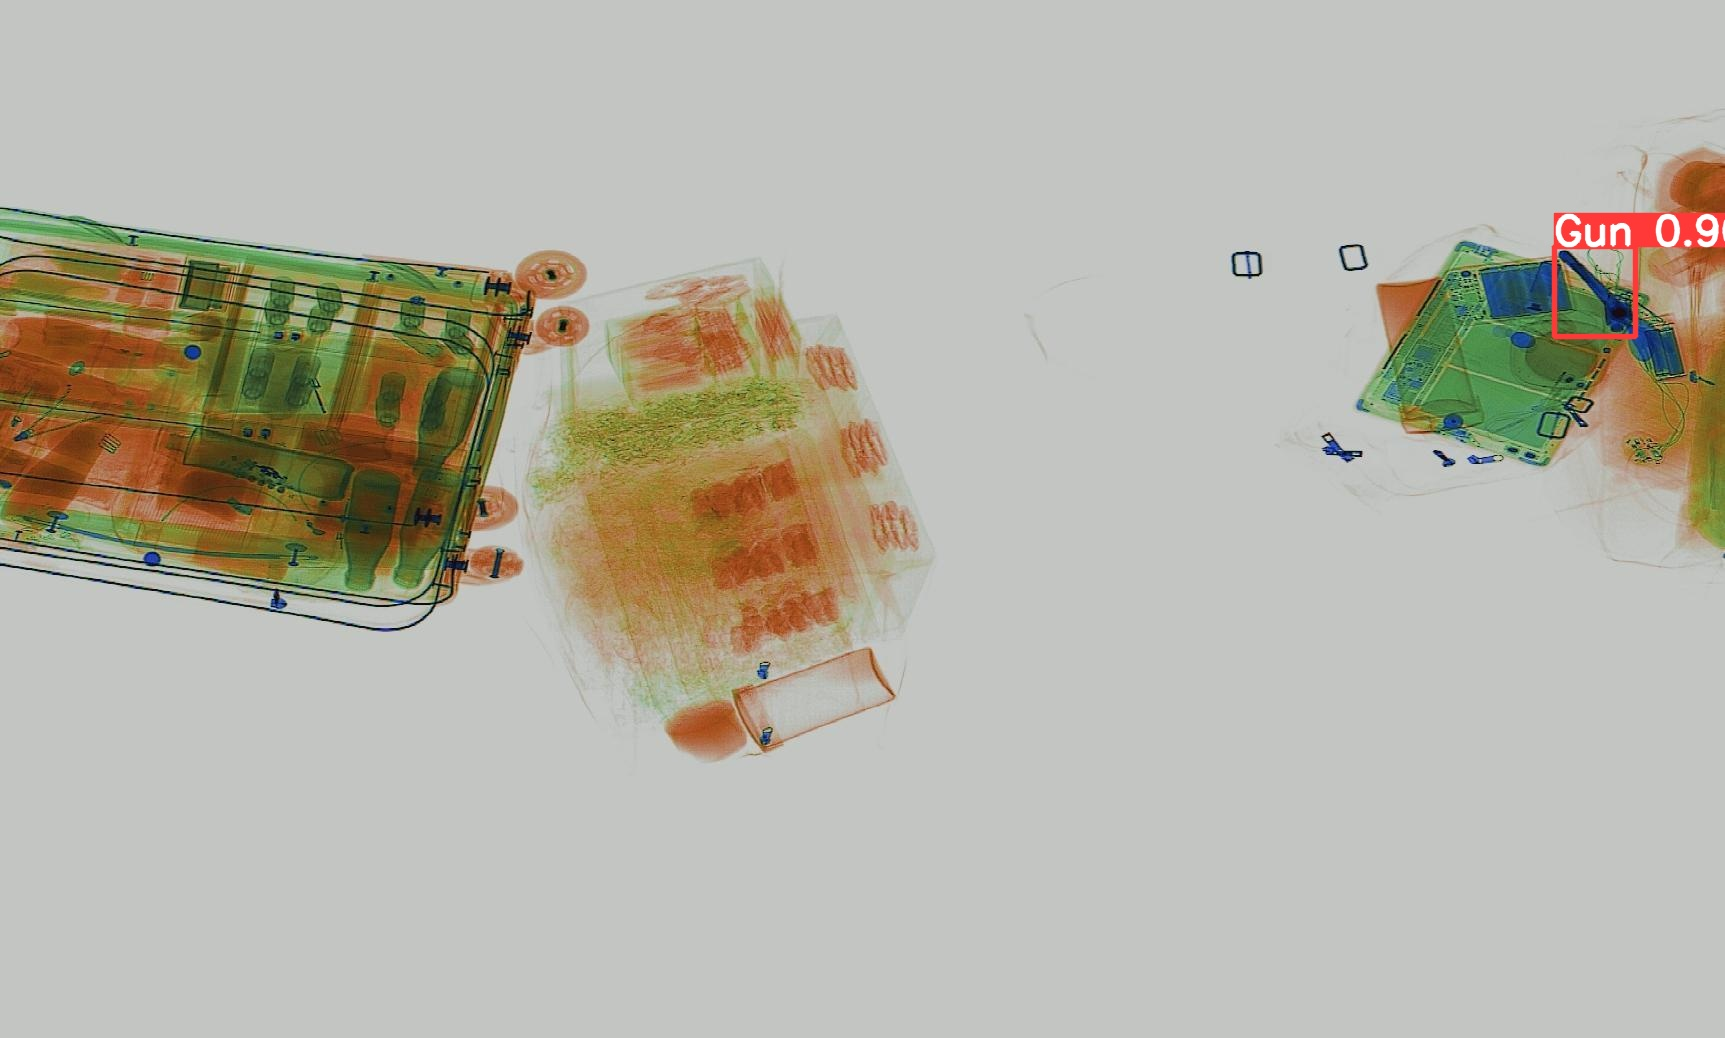

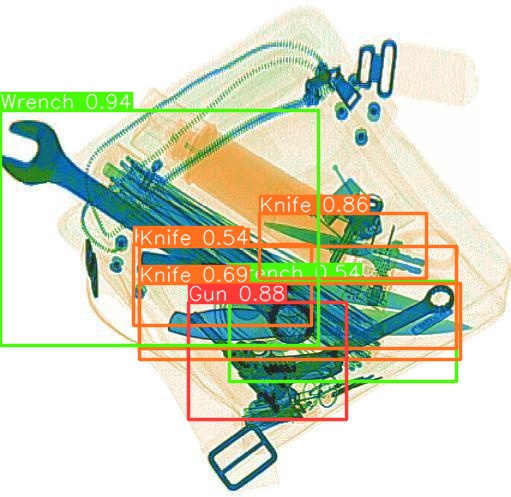

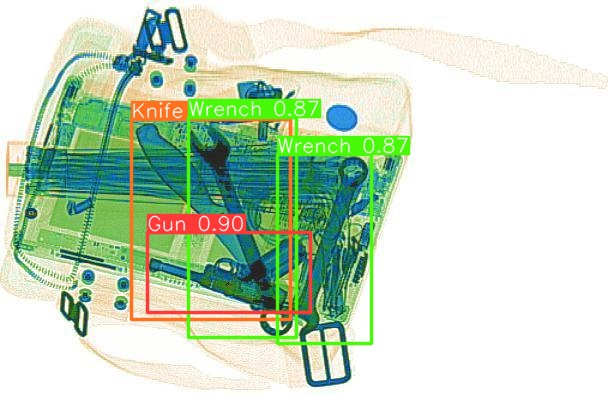

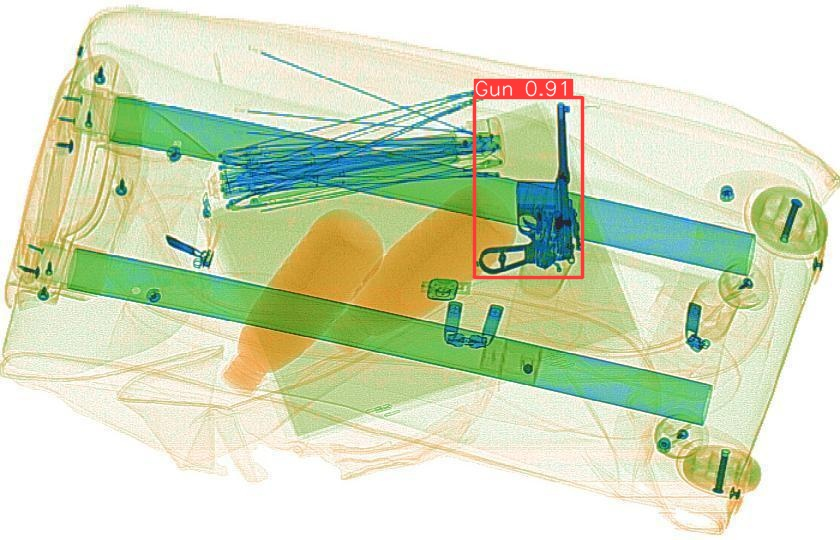

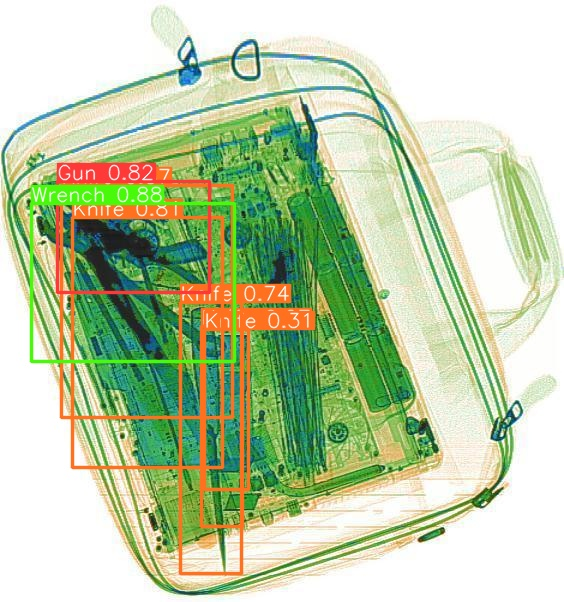

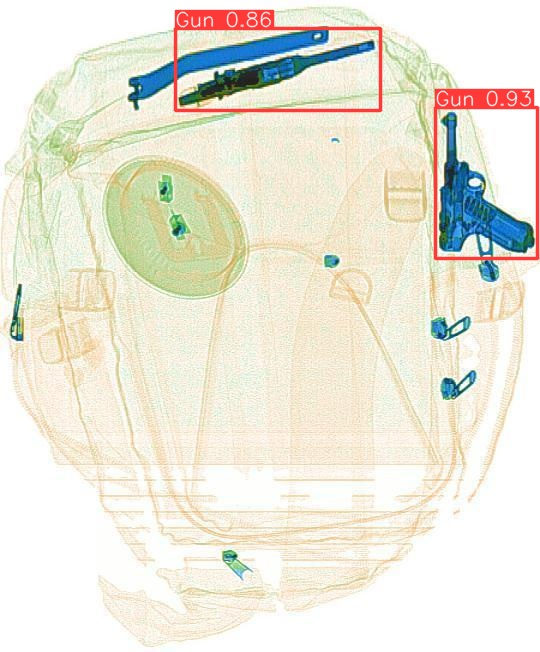

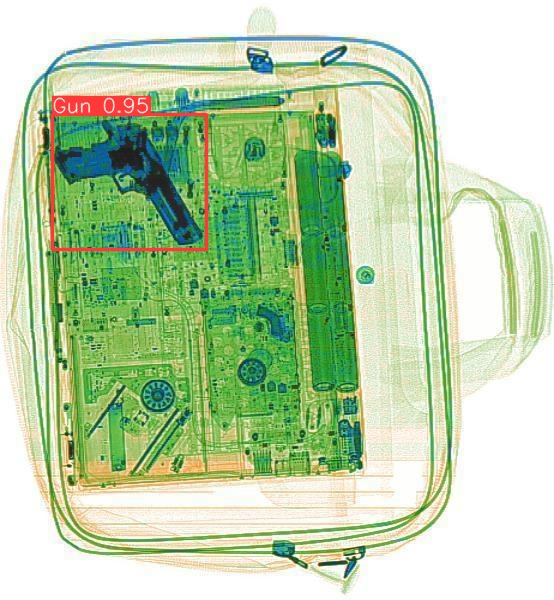

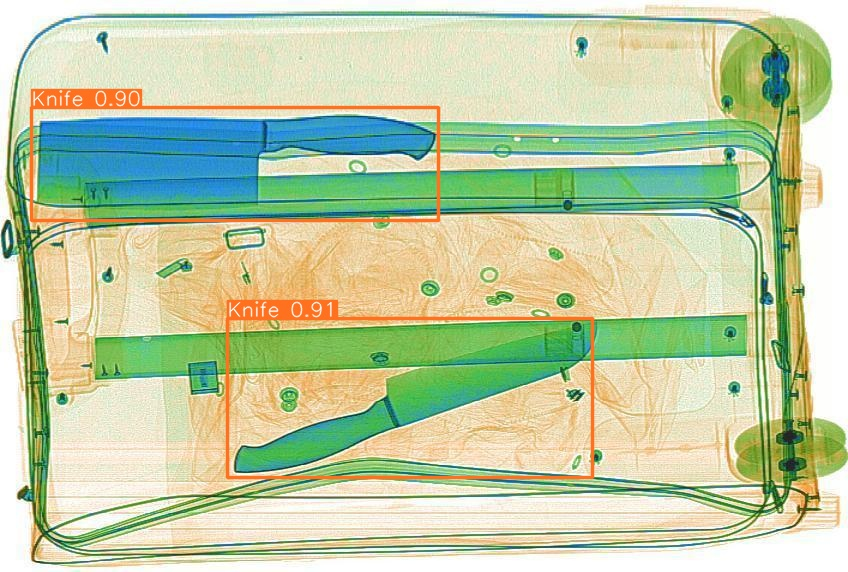

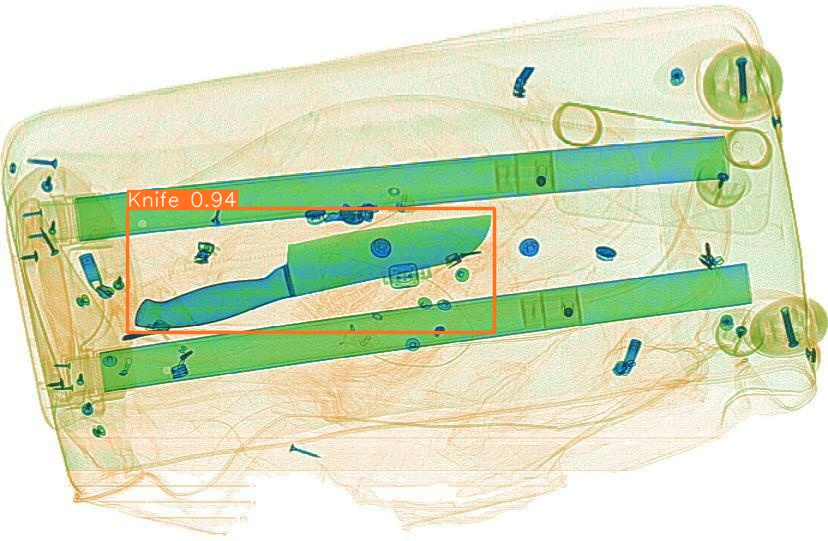

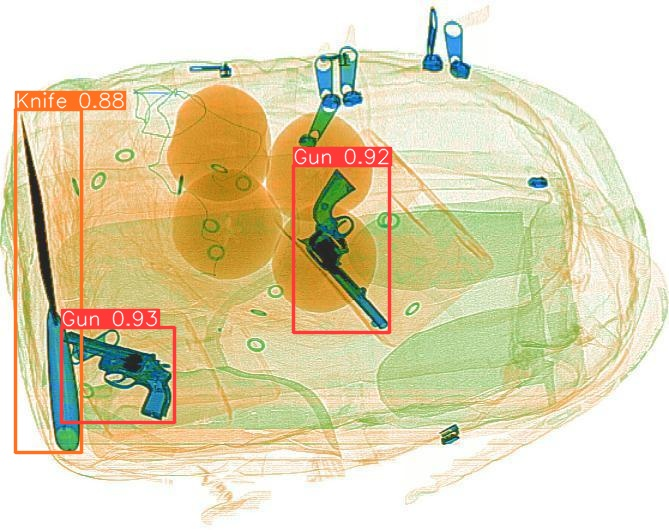

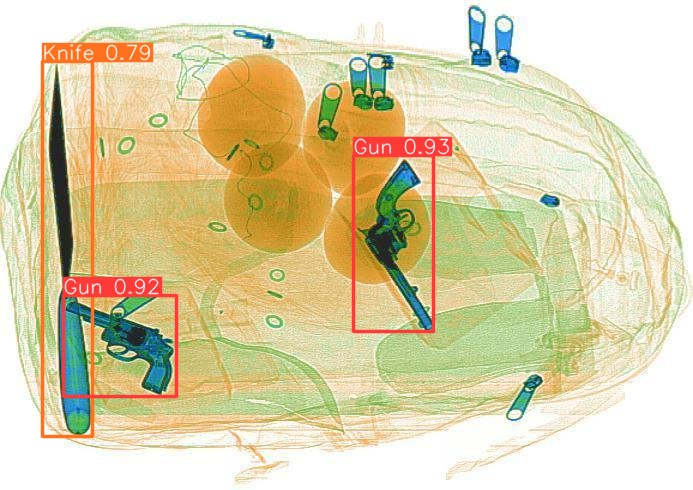

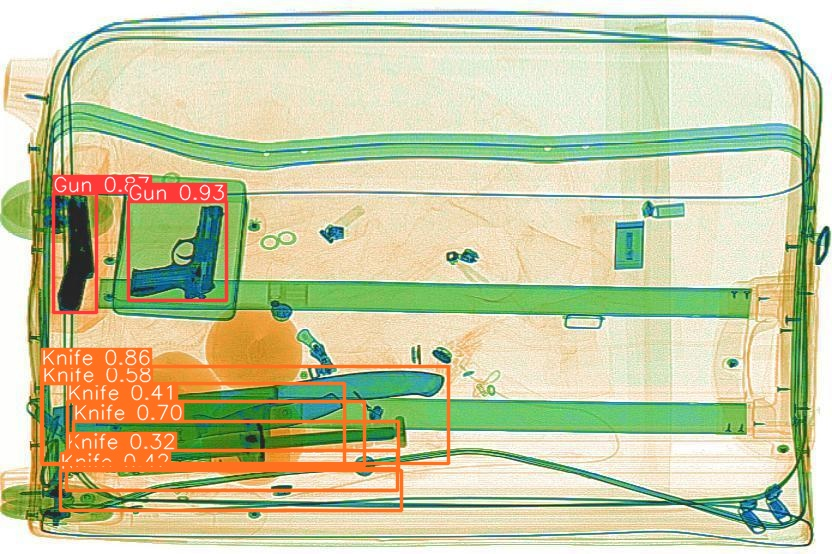

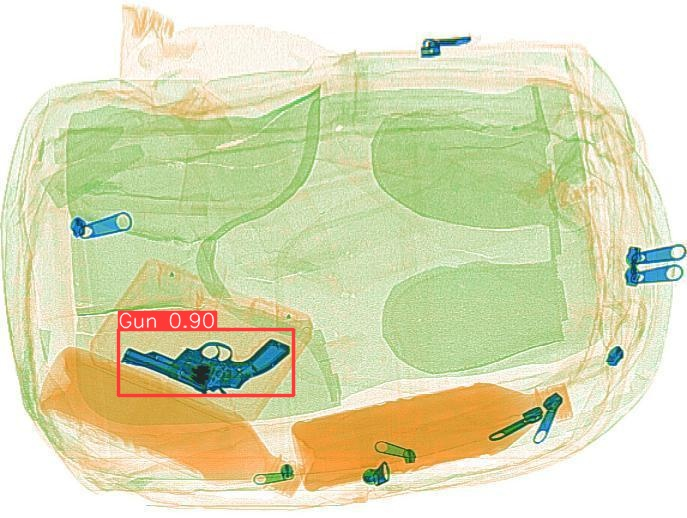

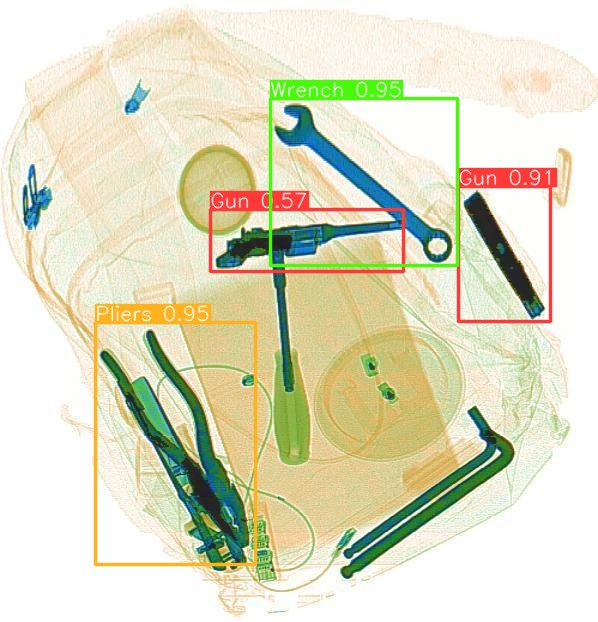

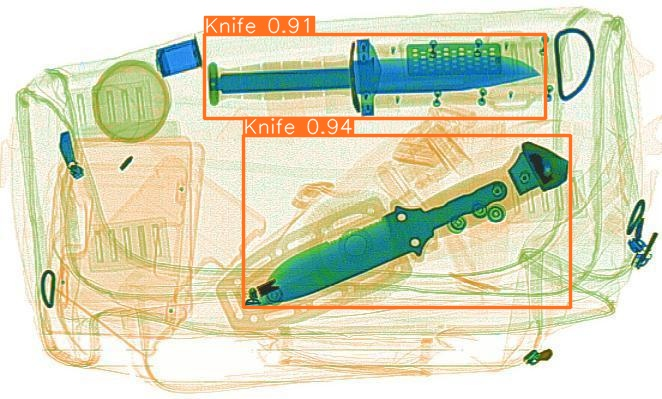

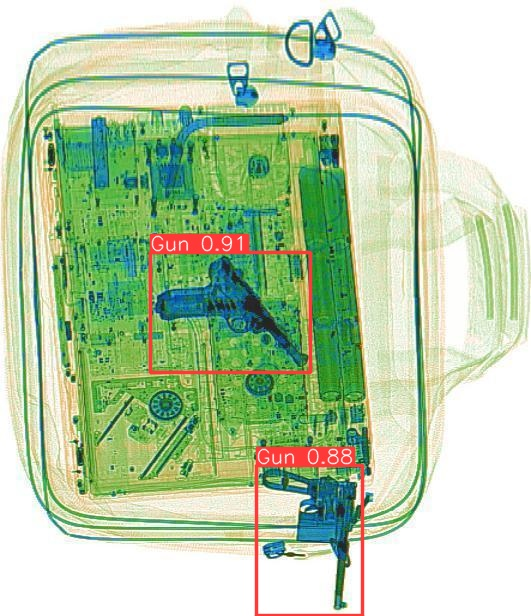

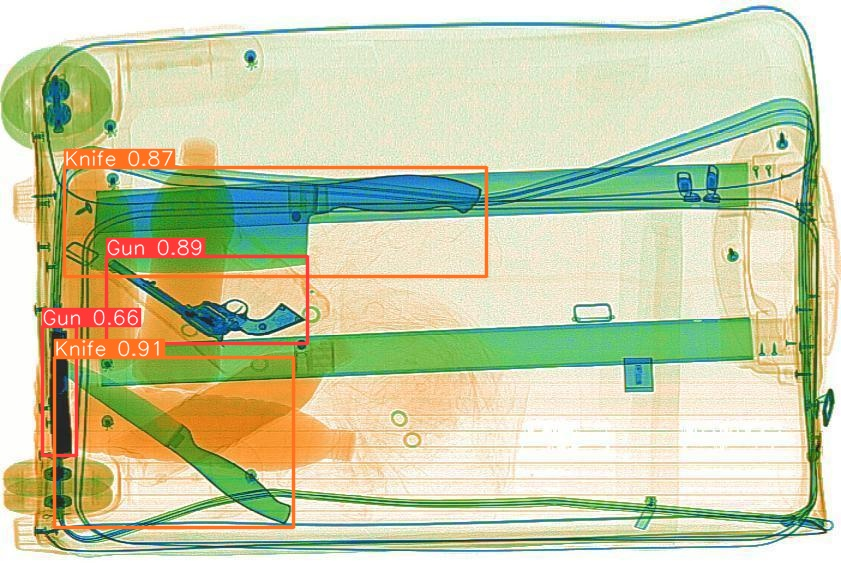

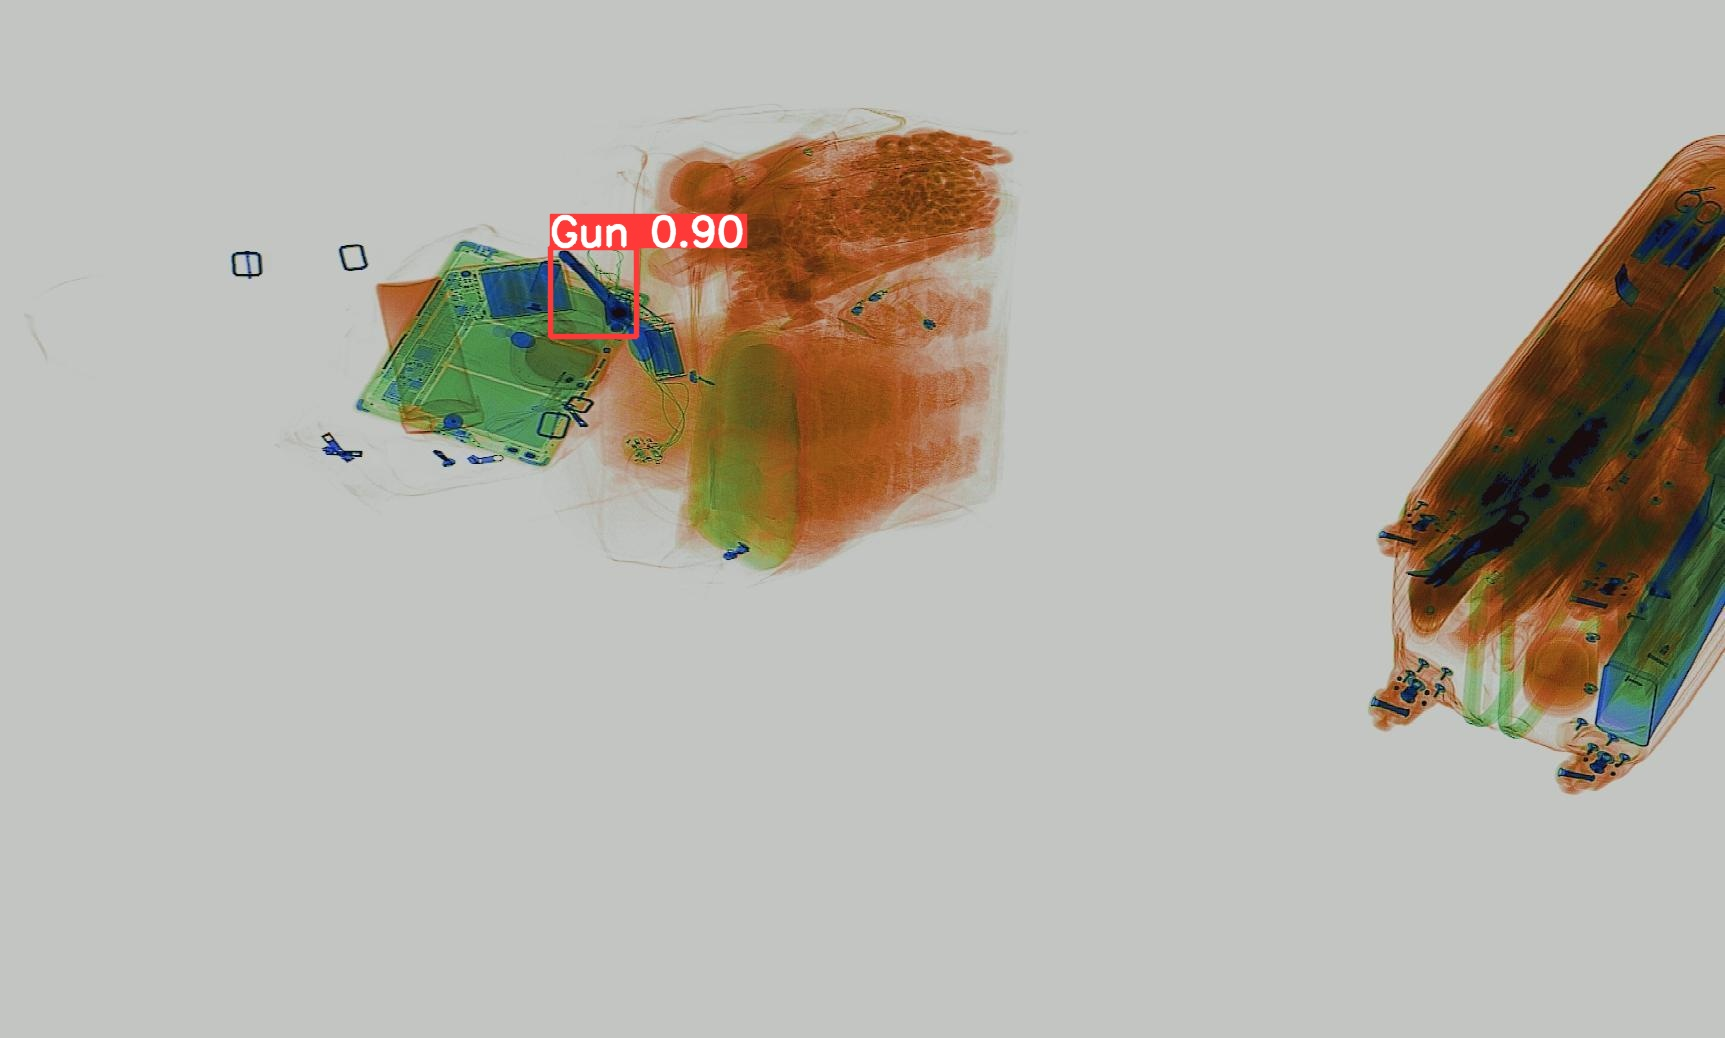

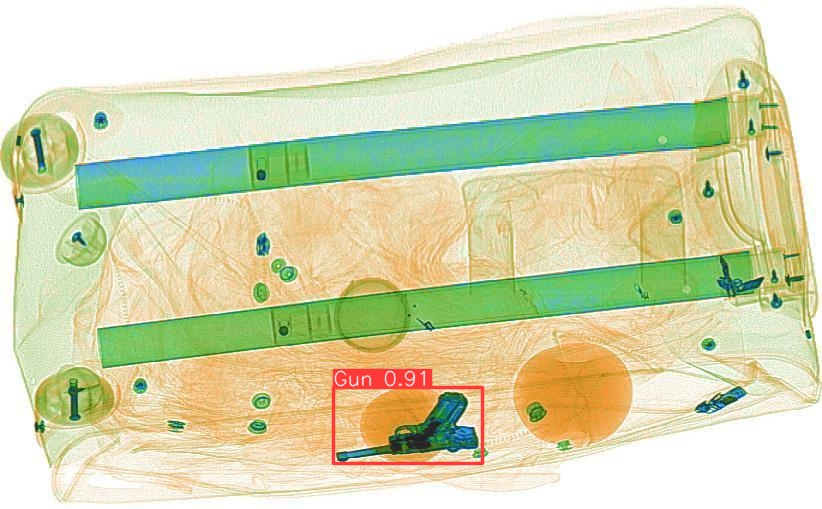

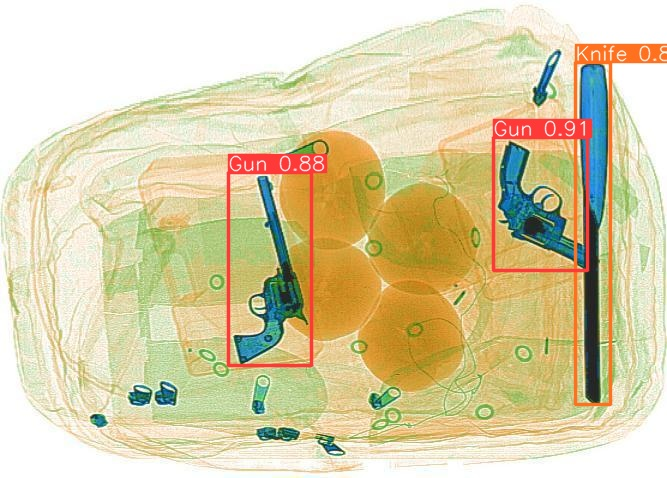

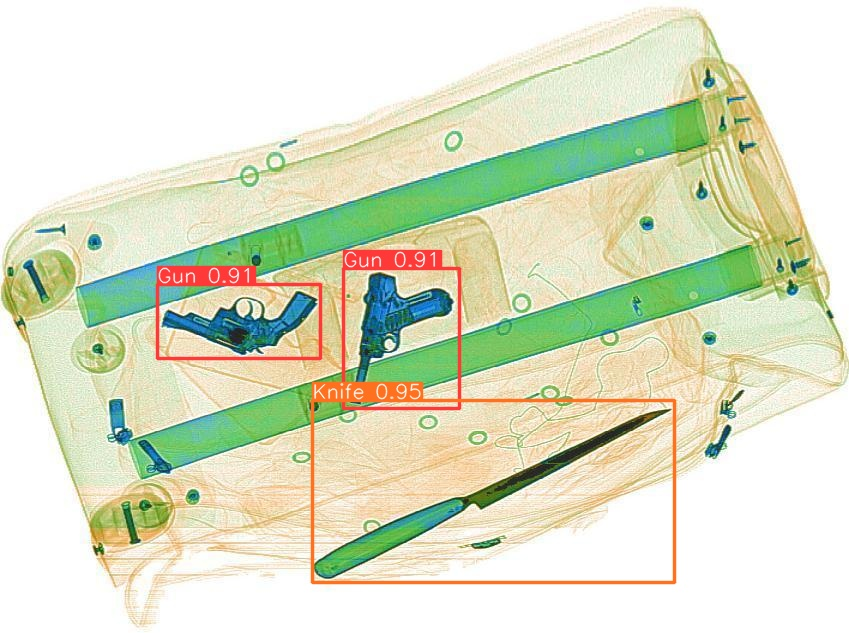

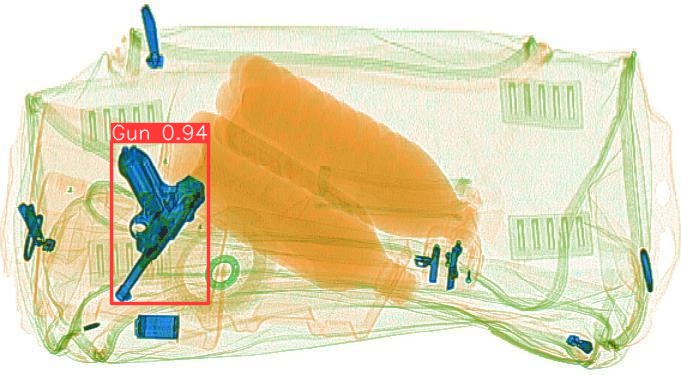

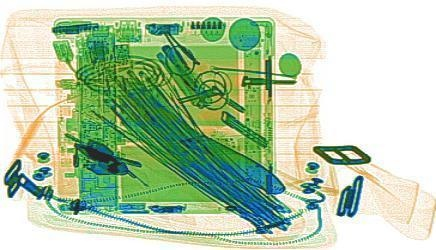

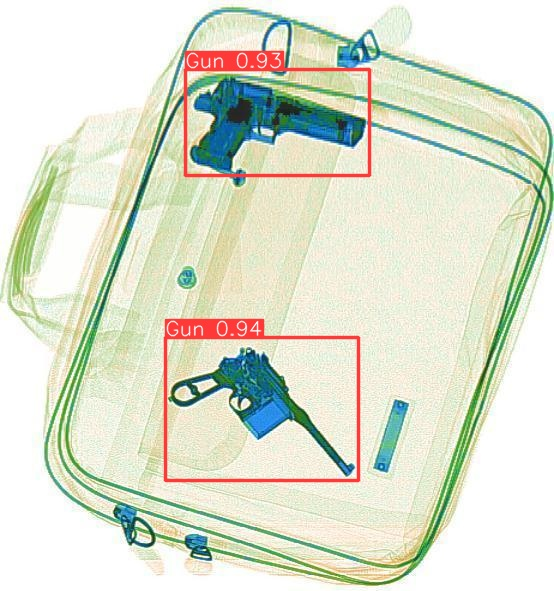

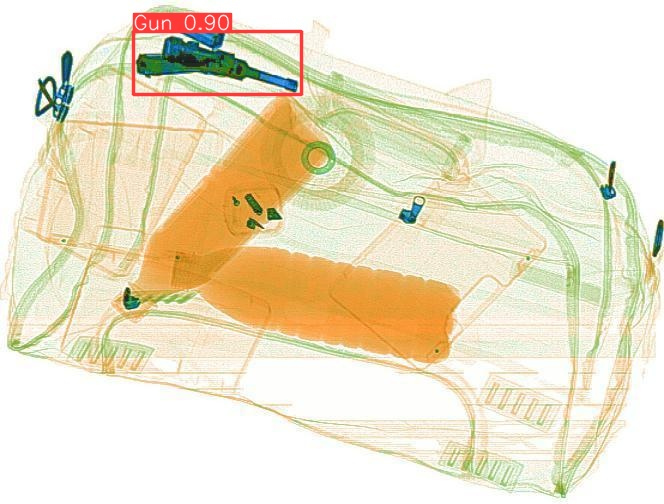

In [12]:
yolo8_model_detection=YOLO('/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/weapon_detection-4/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)



image 1/1 /opt/conda/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 6 Guns, 10.9ms
Speed: 3.5ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
ERROR ❌️ Benchmark failure for PyTorch: '/kaggle/working/datasets/sixray100-1/data.yaml' does not exist

PyTorch: starting from '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)

TorchScript: starting export with torch 2.0.0...
TorchScript: export success ✅ 1.4s, saved as '/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript' (11.9 MB)

Export complete (1.5s)
Results saved to /kaggle/working/YOLO_weights/SIXray_Output/weights
Predict:         yolo predict task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=/kaggle/working/YOLO_weights/SIXray_Output/weights/best.torchscript imgsz=640 data=/kaggle/

In [4]:
!zip -r runs.zip /kaggle/working/runs/detect/val

  adding: kaggle/working/runs/detect/val/ (stored 0%)
  adding: kaggle/working/runs/detect/val/val_batch0_pred.jpg (deflated 16%)
  adding: kaggle/working/runs/detect/val/confusion_matrix.png (deflated 28%)
  adding: kaggle/working/runs/detect/val/val_batch1_pred.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/val/F1_curve.png (deflated 7%)
  adding: kaggle/working/runs/detect/val/confusion_matrix_normalized.png (deflated 24%)
  adding: kaggle/working/runs/detect/val/R_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/val/val_batch2_labels.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/val/P_curve.png (deflated 10%)
  adding: kaggle/working/runs/detect/val/val_batch0_labels.jpg (deflated 16%)
  adding: kaggle/working/runs/detect/val/val_batch2_pred.jpg (deflated 11%)
  adding: kaggle/working/runs/detect/val/val_batch1_labels.jpg (deflated 10%)
  adding: kaggle/working/runs/detect/val/PR_curve.png (deflated 15%)
